In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/netflix_titles.csv")
data.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Visualize shows vs movies**

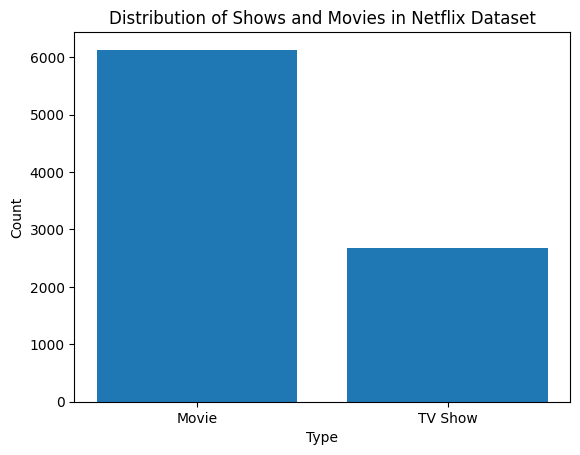

In [3]:
import matplotlib.pyplot as plt
types = ['Movie', 'TV Show']
total_movies = data[data['type'] == 'Movie'].shape[0]
total_shows = data[data['type'] == 'TV Show'].shape[0]
count = [total_movies, total_shows] 
plt.bar(types, count)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Distribution of Shows and Movies in Netflix Dataset')
plt.show()

**Visualize 10 shows and in each year and genre**


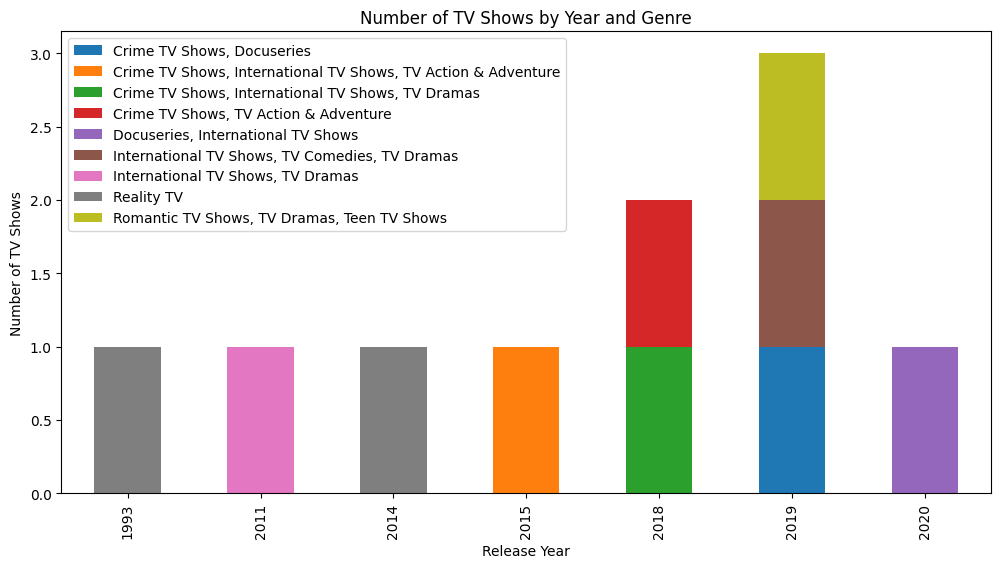

In [4]:
tv_shows = data[data['type'] == 'TV Show']
selected_shows = tv_shows.sample(n=10)
grouped_data = selected_shows.groupby(['release_year', 'listed_in']).size().reset_index(name='count')
pivot_table = grouped_data.pivot(index='release_year', columns='listed_in', values='count').fillna(0)
# Plotting the data
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of TV Shows by Year and Genre')
plt.xlabel('Release Year')
plt.ylabel('Number of TV Shows')
plt.legend(loc='upper left')
plt.show()

**Visualize Distribution of shows by country**


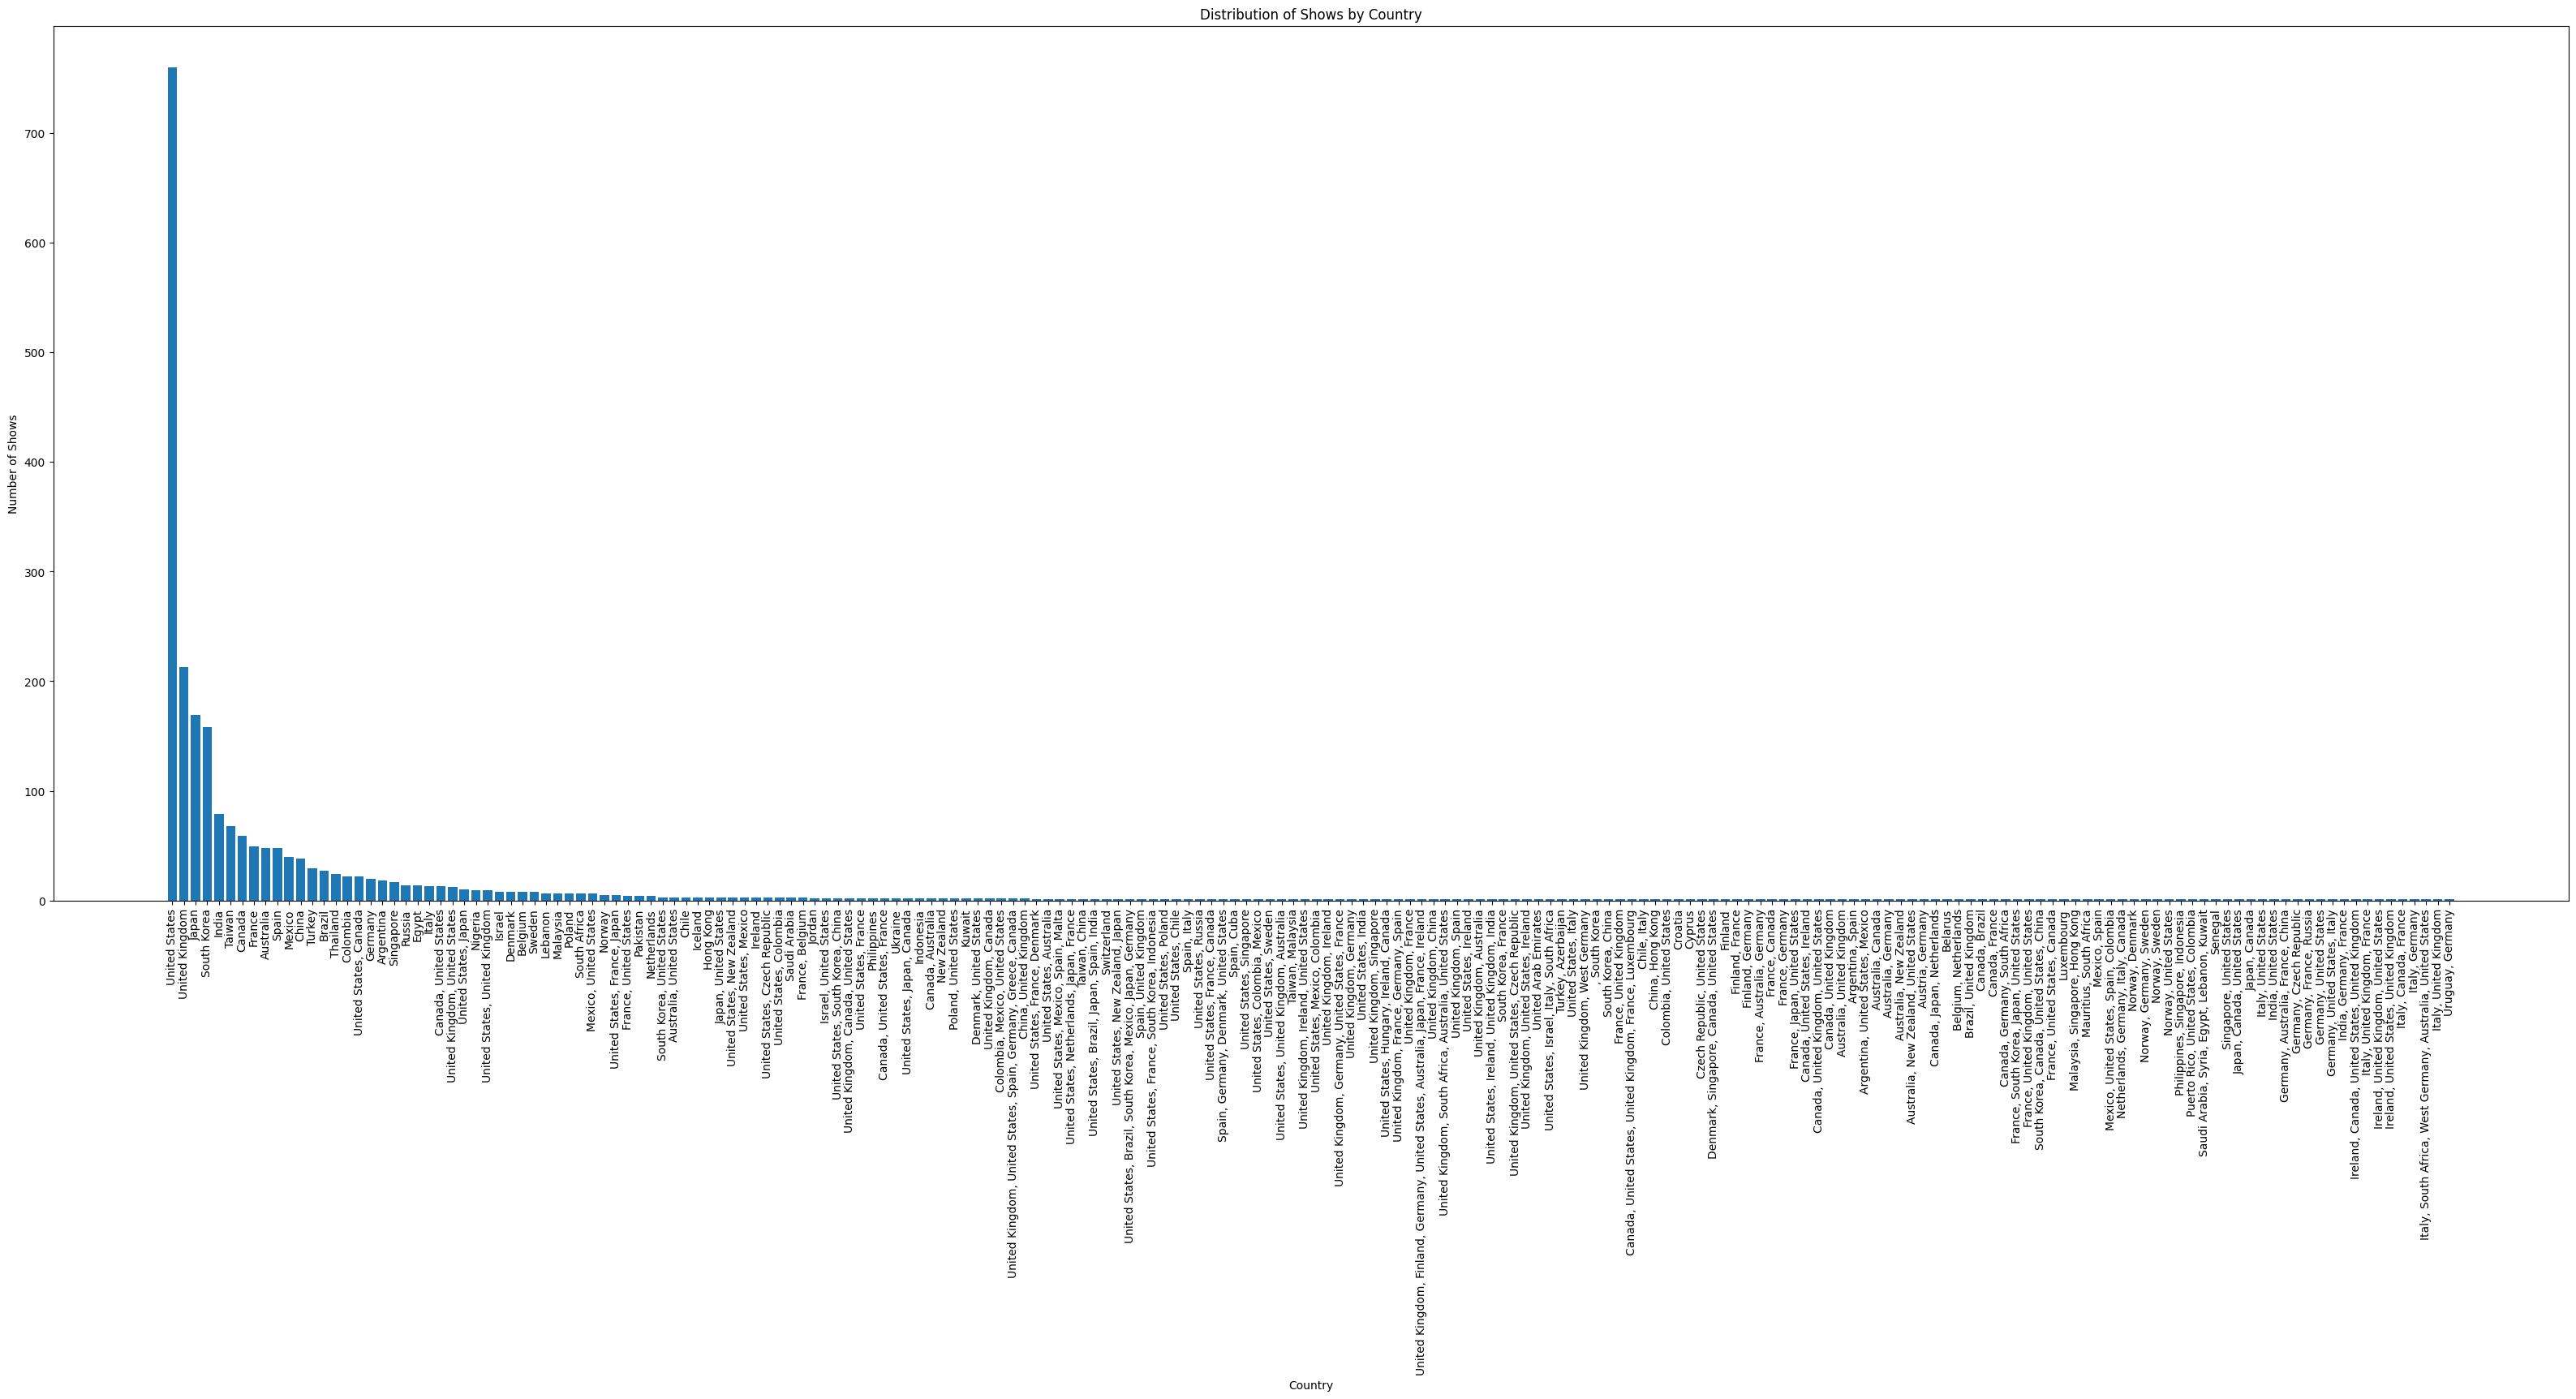

In [5]:
grouped_data = data[data['type'] == 'TV Show'].groupby('country').size().reset_index(name='count')
grouped_data = grouped_data.sort_values('count', ascending=False)
# Plotting the data
plt.figure(figsize=(40, 14))
plt.bar(grouped_data['country'], grouped_data['count'])
plt.title('Distribution of Shows by Country')
plt.xlabel('Country')
plt.ylabel('Number of Shows')
plt.xticks(rotation=90)
plt.show()

**Clean and prepare data, get rid of nulls**

In [6]:
null_values = data.isnull().sum()
print(null_values)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [7]:
data = data.dropna()
null_values = data.isnull().sum()
print(null_values)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [8]:
data = data[:2000] # I have to do this because For Association rules, i don't get good results and rules take long time.
data.shape

(2000, 12)

**Discuss some of your findings**


The number of movies in the dataset is more than twice the number of TV shows.The number of movies is around 6000 and the number of TV shows is around 2500. I can see that Docuseries in 2017, British TV shows in 2018, crime TV shows in 2019 are in vogue and over-published.TV comedies are on the rise in 2020.There are more children's shows in 2021 and 1993. According to the data, the countries with the highest number of broadcasts are United States, United Kingdom, Japan, South Korea, respectively. United States has widened the gap.

**saving new dataset**

In [9]:
data.to_csv('new_netflix_datas.csv', index=False)